Group work (2 students)

<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2021/22)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 2</h1>
<h2 style="color:rgb(0,120,170)">Getting to Know Word Embedding!</h2>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-taskA"><li style="font-size:large;font-weight:bold">Task A: Similarity, Nearest Neighbors, and WE Evaluation (20 points)</li></a>
    <a href="#section-taskB"><li style="font-size:large;font-weight:bold">Task B: Document Classification with WE (10 points)</li></a>
    <a href="#section-taskC"><li style="font-size:large;font-weight:bold">Task C: Classification with sent2vec Document Embeddings (2 extra point)</li></a>
    <a href="#section-references"><li style="font-size:large;font-weight:bold">References</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to get familiarized with using word embedding (WE) models in practice. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

### Implementation & Libraries

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

### Submission

Each group submits one Notebook file (`.ipynb`) through MOODLE. Do not forget to put in your names and student numbers in the first cell of the Notebook. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that one can run all the cells from top to bottom without any error. If you need to include extra files in the submission, compress all files (together with the Notebook) in a `zip` file and submit the zip file to MOODLE. You do not need to include the data files in the submission.

Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments.  


### Dataset

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07c9c862b017c9cfba294077a/33590/5792942781153185740/nlp2021_22_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>



In [1]:
'''# Get access to your data stored in google drive:
from google.colab import drive
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/NLP_2021/nlpwdl2021_data"
train_path = folder_path +  "/thedeep.small.train.txt" # ich habe einfach mal das kleine dataset genommen. könnens auch ändern.
#train_data = open(train_path) # only work with copies''';

<a name="section-taskA"></a><h2 style="color:rgb(0,120,170)">Task A: Similarity, Nearest Neighbors, and WE Evaluation (20 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

**Loading a word embedding (WE) model (2 points).** Download a pre-trained word embedding model such as word2vec (https://code.google.com/archive/p/word2vec/) or GloVe (https://nlp.stanford.edu/projects/glove/). You can load the downloaded vectors into arrays, or use libraries such as `gensim` to download and process the vectors. 

**Calculating word-to-word similarities (3 points).** Select <ins>3 arbitrary words</ins>, referred to as *source words*. For each source word, calculate the cosine similarities to the <ins>5 other words</ins>, that from your own linguistic judgement have various levels of semantic relations to the source word (from highly related to not related at all). Compare the output similarities with your judgements on the semantic relations of words, and report your observations. Consider that when calculating the cosine similarities, DO NOT use the provided functionalities of any library, but implement the cosine similarity as a function that takes two vectors and returns a similarity score.

**Calculating nearest neighbors (7 points).** For the selected source words, retrieve the 10 nearest neighbors in the word embedding model, namely the words that have the highest similarities to the source word. Consider that when calculating the nearest neighbors, DO NOT use the provided functionalities of any library but implement it as the function that takes a source vector, a set of target vectors, and a $k$ parameter, and returns the $k$ nearest neighbors and their similarity scores. This function should provide an *efficient* calculation of nearest neighbors. An inefficient way (which should be avoided!) would be looping over the set of vectors in the word embedding model, and one by one calculating the cosine similarity of a source vector to each of the target vectors. As a hint for an efficient way, consider that in `numpy` (and other libraries), calculating the dot product of a vector to a matrix is much faster than the dot products of the vector to each vector of the matrix. (**3 out of 7 points for efficiency**)

**WE evaluation (8 points).** There have been several efforts in devising benchmarking datasets to intrinsically evaluate the *goodness* of word embedding models. [Levy et al.](https://aclanthology.org/Q15-1016.pdf) [1] in Section 4.3 describe the two evaluation category of *Word Similarity* and *Analogy* tasks, reference the various datasets of each task, explain the method(s) to calculate the required quantities, and finally discribes the method to evaluate the models on the tasks. Following the descriptions in the paper, select one word similarity and one analogy dataset, download the corresponding datasets (the datasets are publicly available –– they can also be found through the cited papers), and conduct the evaluation process on the WE model. For the analogy task, conduct the experiments using both `3CosAdd` and `3CosMul` methods. Report the evaluation results. Your results should be in the range of the ones reported in the paper (for sanity check). As before, provide your own implementation of the calculations and DO NOT use the functions of libraries.

</div>

### just loading the dataset into memory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [2]:
size = "small"
#size = "medium"
data_dir = Path("nlp2021_22_data") / Path("nlpwdl2021_data")
filenames = [filename for filename in os.listdir(data_dir)]
filenames

['.DS_Store',
 'README.txt',
 'thedeep.labels.txt',
 'thedeep.medium.test.txt',
 'thedeep.medium.train.txt',
 'thedeep.medium.validation.txt',
 'thedeep.small.test.txt',
 'thedeep.small.train.txt',
 'thedeep.small.validation.txt']

In [3]:
labels = (data_dir / "thedeep.labels.txt").read_text().splitlines()
labels = [x.split(",")[1] for x in labels]
labels

['Agriculture',
 'Cross',
 'Education',
 'Food',
 'Health',
 'Livelihood',
 'Logistic',
 'NFI',
 'Nutrition',
 'Protection',
 'Shelter',
 'WASH']

In [4]:
Z_test_dir = (data_dir / f"thedeep.{size}.test.txt")#.read_text()#.splitlines()
Z_train_dir = (data_dir / f"thedeep.{size}.train.txt")
Z_validation_dir = (data_dir / f"thedeep.{size}.validation.txt")

In [5]:
pd_test = pd.read_csv(Z_test_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)
pd_train = pd.read_csv(Z_train_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)
pd_vali = pd.read_csv(Z_validation_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)

In [6]:
pd_train

,id,text,label
0,6615,Cholera Daily Situation Report as of 4 Novembe...,4
1,659,"12 321 people affected, five deaths, one perso...",10
2,8591,Violent clashes and inter-communal tensions ha...,3
3,8373,AT least 12 people have been killed and severa...,5
4,10125,"Unidentified gunmen attacked a civilian home, ...",9
...,...,...,...
8395,528,Sandbag walls have failed to hold back the flo...,10
8396,2272,"More than 8,000 displaced civilians have been ...",10
8397,11493,Protection Durable Solutions ? Most of the...,9
8398,3816,She said access challenges have continued to d...,3


In [7]:
X_train, X_test, X_vali = [x.text.to_numpy() for x in [pd_train, pd_test, pd_vali]]
y_train, y_test, y_vali = [y.label.to_numpy() for y in [pd_train, pd_test, pd_vali]]

## Loading a word embedding (WE) model

In [8]:
#df = pd.read_csv('glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
#glove = {key: val.values for key, val in df.T.items()}
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

gloveModel = load_glove_model("glove.6B.100d.txt")

Loading Glove Model
400000 words loaded!


In [9]:
gloveModel["service"], gloveModel["service"].shape

(array([-0.4224  , -0.13313 , -0.41418 , -0.23677 ,  0.19041 , -0.32738 ,
        -0.23698 ,  0.57607 , -0.072985,  0.035825,  0.31916 , -0.33207 ,
         0.26005 ,  0.29836 ,  0.026027, -1.0519  ,  1.4233  , -0.28315 ,
        -0.75118 ,  0.19966 , -0.44334 , -0.25169 ,  0.12302 ,  0.12018 ,
         0.48829 , -0.29525 , -0.095826,  0.37184 ,  0.046189,  0.029206,
         0.12688 ,  1.0816  , -0.25109 , -0.42187 ,  0.22496 ,  0.44294 ,
        -0.98031 , -0.070257,  0.2825  , -0.069401,  0.40148 , -0.34647 ,
        -0.22201 , -0.044113,  0.62697 , -0.035738,  0.35029 , -0.80169 ,
         0.4902  , -0.30755 ,  0.72715 ,  0.19385 , -0.066447,  0.93629 ,
        -0.035545, -1.9468  ,  0.3688  , -0.32078 ,  3.1815  ,  0.70017 ,
        -0.1323  , -0.32202 ,  0.35374 , -0.22017 , -0.014307, -0.2664  ,
        -0.24965 , -0.057606,  1.3354  ,  0.63444 , -0.22013 , -0.44862 ,
         0.1921  , -0.61758 ,  0.73737 ,  0.19194 ,  0.67979 ,  0.49879 ,
        -0.96222 , -0.85897 ,  0.41978

In [10]:
data_path = "vocab_words_ordered_standardized.txt"
pd_word = pd.read_csv(data_path, sep='\n', names=["name"])

In [11]:
nope = 0
for word in pd_word.name:
    try:
        gloveModel[word]
    except:
        nope += 1
        print(word)

print(f"\nFrom {len(pd_word.name)} words in ouer vocabulary there are only {nope} which are not present in the glove.100d model (see above)")

[UNK]
•
country’s
isil
genderbased
belowaverage
“the
nfis
arraqqa
deirezzor
“we
sudan’s
enawo
awdcholera
idleb
people’s
fiveyear
dabanga
agropastoral
200000
melkadida
mayendit
cox’s
conflictaffected
casepatients
year’s
tamazuj
smoh
it’s
don’t
ngca
alalil
sana’a
city’s
aboveaverage
monguno
kutupalong
gaza’s
children’s
300000
201617
government’s
foodinsecure
ninewa
grand’anse
ayod
alshabaab
600000
yemen’s
sgbv
droughtaffected
dikwa
snnp
kukawa
201718
“there
schoolaged
cashbased
bikoro
400000
midmarch
asylumseekers
kasaï
fsnau
ewars
850000
subcounty
panyijiar
inkind
dref
dar’a
conflictrelated
baladiyas
250000
women’s
saudiled
rebelheld
muac
lifethreatening
households’
hawiga
cvdpv2
90000
150000
“i
worstaffected
hodeidah
farmers’
can’t
avdiivka
world’s
wfp’s
unhcr’s
hilaweyn
femaleheaded
500000
20162017
underfive
telafar
region’s
rdts
pulka
hardtoreach
casefatality
330000
“in
setsan
nayapara
midnovember
kajokeji
ethiopia’s
260000
120000
“crisis”
we’re
state”
splmn
nyirol
mid2017
laboratory

oppositioncontrolled
olympicsized
oecusse
ocv
octobertodecember
n’djamena
nu’man
nuwar
nutrion
nuevitas
now”
nordubangi
nordest
nontrauma
nonmuslim
nonfunctionality
nonconflictaffected
noncases
niñorelated
ngagam
nficox’s
newlydisplaced
needsrehabilitating
ndoh
ndmo
nchelenge
namuno
nabul
murnei
mugran
muchneeded
mpoko
mosulas
mossuril
morrumbene
more”
mopic
months”
mondaythe
monapo
mombonga
mobbar
miziara
ministry’s
migrants’
midupper
midjuly
mid2016
michika
meshateeh
merti
men’s
medicines”
meconta
measlesrubella
mdrtb
ma’amoun
ma’ale
mazot
mayadin
maute
matanzasdamage
massinga
masaken
masafer
marchtropical
manshiyet
maniemahumanitarian
malnutrit
maisi
mahjis
mahafaly
madagali
mabalane
lppd
lowari
lmudug
llgs
lives”
lifein
libya’s
level  
levelsthe
land”
lactang
kyaingtong
kurdishled
krg’s
korea’s
knockon
kmhover
kiziba
kivu’s
kilosa
kibuyu
kibossi
khartoums
kawergosk
kasung
kasaicentral
karankarma
kalonda
kalamu
kahda
kabul’s
kabelawa
kabbe
jubbaland
jnim
jisreen
jibreen
janzour
jala

## Calculating word-to-word similarities 

In [13]:
def show_random_samples(df, how_many = 3):
    for _ in range(how_many):
        x = np.random.choice(len(df))
        l = pd_train.iloc[x].label
        idd = pd_train.iloc[x].id
        print(f"label: {l} = {labels[l]}\t\t id = {idd}", )    
        print(pd_train.iloc[x].text)
        print("\n")

In [14]:
show_random_samples(pd_train, 100)

label: 4 = Health		 id = 4218
Apart from seasonal flu, Albania is threatened even by the avian flu, known as the bird flu. Minister of Agriculture, Edmond Panariti, declared on Monday that this flu circulates in Greece and Croatia, in Balkans and EU countries and despite the fact that Albania is still not infected the risk is very high and the country is on alert.


label: 9 = Protection		 id = 3057
he Iraqi Observatory for Human Rights (IOHR) stated that dozens of displaced families originally from ISIS-controlled districts: Qaim, Ramadi and Fallujah, face the threat of forcible deportation from Heet disrict in Anbar province, 190 km west of Baghdad.  The monitoring network at IOHR has documented the threats to deport internally displaced people (IDPs) from Falluja and Ramadi, as well as decisions to reject those who have been displaced from areas west of Anbar. 


label: 3 = Food		 id = 3693
Meanwhile, people who stay are without food and water. No steady supplies have been able to r

label: 3 = Food		 id = 8004
Severe acute malnutrition rates are highest in the conflict affected areas in the north, exceeding 15 per cent in Timbuktu, while limited donor interest has made it harder to acquire the necessary amounts of therapeutic food, critical to curing malnourished children. 


label: 4 = Health		 id = 11302
The national attack rate is 274.41 per 10,000. The five governorates with the highest cumulative attack rates per 10,000 are Amran (666), Al Mahwit (611), Al Dhale’e (580), Abyan (466) and Sanaa (392). In September, the districts with higher numbers of deaths are Al qafr (4), As Sabrah (4), Hazm al Udayn(3) and Hubaysh(3).


label: 9 = Protection		 id = 11714
With conflict in Yemen hitting civilians hard, killing and injuring many and causing widespread hunger, some 30,600 Somalis have reportedly already returned to Somalia from since hostilities broke out in March 2015.


label: 4 = Health		 id = 8220
Relief organizations in Afrin reported the need for addition

Refugees in Jebel Aulia lacks basic needs The Chairperson of South Sudanese refugees living Sudan says their situation is getting worse due to lack of humanitarian assistance in the camps.  Sultan John Maskar, the Chief of Refugees sheltering at Jebel Aulia camp in Khartoum, said the Sudanese government is restricting the number of NGOs willing to provide assistance to the refugees.  He said there is scarce food and medical supplies in the camps.Sultan Maskar told Eye Radio that the camp is home to more than 900 households, but there is not a single NGO is based in the camp.He said they even lack basic items like blankets, shelter material, mosquito nets, and other non-food items, forcing many of them to look for manual jobs at the nearby Sudanese homes.


label: 10 = Shelter		 id = 5248
Storm weather conditions during the winter months, including heavy rain, can create floods in the streets of the Gaza Strip due to poor and overcrowded urban infrastructure that cannot handle the rate 

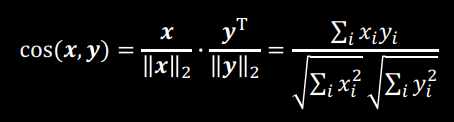

In [15]:
def cosine(x, y):
    '''function that takes two vectors and returns a similarity score
    i.e. the normalized dot product of two vectors which lies between -1 and +1
    '''
    nominator = x @ y.T
    denominator = (x @ x.T) * (y @ y.T)
    return nominator / ( denominator**0.5 )

In [16]:
cosine(gloveModel["man"], gloveModel["king"])

0.511868147241968

In [17]:
# since, as far as I know, a dictonary in Python is not ordered I extract the words & corresponding vectors together
# to avoid erros (did this for later -> nearest neighbor task)

glove_vecs = []
glove_words = []
for word in gloveModel:
    glove_vecs.append(gloveModel[word])
    glove_words.append(word)
    
glove_vecs = np.array(glove_vecs).T
glove_words = np.array(glove_words)

In [18]:
glove_vecs.shape, glove_vecs, glove_words

((100, 400000),
 array([[-0.038194, -0.10767 , -0.33979 , ...,  0.36088 , -0.10461 ,
          0.28365 ],
        [-0.24487 ,  0.11053 ,  0.20941 , ..., -0.16919 , -0.5047  ,
         -0.6263  ],
        [ 0.72812 ,  0.59812 ,  0.46348 , ..., -0.32704 , -0.49331 ,
         -0.44351 ],
        ...,
        [-0.1459  , -0.83155 , -0.23394 , ...,  0.27139 ,  0.42527 ,
          0.43678 ],
        [ 0.8278  ,  0.45293 ,  0.47298 , ..., -0.29188 , -0.5125  ,
         -0.82607 ],
        [ 0.27062 ,  0.082577, -0.028803, ...,  0.16109 , -0.17054 ,
         -0.15701 ]]),
 array(['the', ',', '.', ..., 'rolonda', 'zsombor', 'sandberger'],
       dtype='<U68'))

I wanted to visualice the similiarity of the glove100d vectors so I just used PCA, it probably adds a bit of noise but I think its works good enough

In [19]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(glove_vecs.T)

PCA(n_components=2)

In [20]:
def compare_words(words_100):
    words2 = []
    for w in words_100:
        words2.append( pca.transform([gloveModel[w]])[0] )
    x_cords = [x[0] for x in words2]
    y_cords = [y[1] for y in words2]
    fig, ax = plt.subplots()
    ax.scatter(x_cords, y_cords)
    plt.grid()
    
    for i, txt in enumerate(words_100):
        ax.annotate(txt, (x_cords[i], y_cords[i]))
        #ax.arrow(0.0, 0.0, x_cords[i], y_cords[i])#, head_width=0.4, head_length=0.5)

    ax.axhline(0, xmin=-1, xmax=1, color='black')
    ax.axvline(0, ymin=-1, ymax=1, color='black')

In [21]:
woman = ["hausfrau", "queen", "kitchen", "earthquake", "week"]
car = ["automobile", "vehicle", "bike", "books", "week"]
time = ["month", "week", "start", "bratwurst", "stone"]

source_words2 = {'woman': woman, 'car': car, 'time': time}

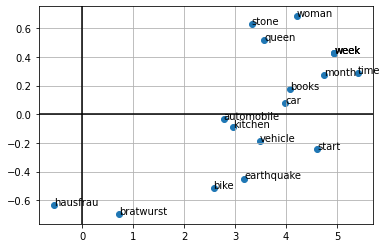

In [22]:
compare_words([w for w in source_words2] + woman + car + time)

In [23]:
word_5 = ["female", "vehicle", "week", "earthquake", "bratwurst"]

source_words = {'woman': word_5, 'car': word_5, 'time': word_5}

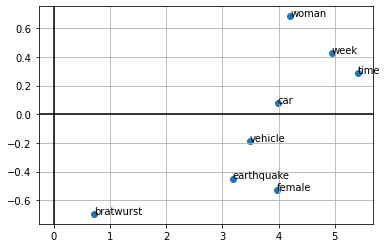

In [24]:
compare_words([w for w in source_words] + word_5)

In [25]:
cosine_simis = {}
wo_simis, car_simis, time_simis = [], [], []

for w in woman:
    wo_simis.append(cosine(gloveModel["woman"], gloveModel[w]))
cosine_simis["woman"] = wo_simis
    
for w in car:
    car_simis.append(cosine(gloveModel["car"], gloveModel[w]))
cosine_simis["car"] = car_simis
    
for w in time:
    time_simis.append(cosine(gloveModel["time"], gloveModel[w]))
cosine_simis["time"] = time_simis

In [26]:
df_cosine_simis = pd.DataFrame(cosine_simis)
df_cosine_simis.index = word_5
df_cosine_simis

,woman,car,time
female,-0.019512,0.683194,0.716649
vehicle,0.509515,0.863084,0.749251
week,0.365653,0.632471,0.813701
earthquake,0.218111,0.255743,-0.249617
bratwurst,0.443570,0.457035,0.392402


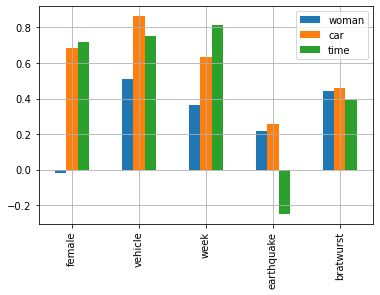

In [27]:
df_cosine_simis.plot.bar()
plt.grid();

#### Compare the output similarities with your judgements on the semantic relations of words, and report your observations.

- I think even though woman and female have similiar semantics they are not often used in similiar contexts e.g. "In the news: 60% of female died during the earthquake." Therfore the score is not to odd.

- Vehicle & car have the highest similarity score followed by the words week & time, which is totaly relateable.

- It´s strange that time & earthquake have a negative score.

- And maybe even stranger that bratwurst has a ~0.4 score to woman, car and time.


I think overall the scores across those 8 words are good but could be better. Also it is nice that the PCA scatter plot with its 18 words has some clusters even though it seems a bit noisy.

## Calculating nearest neighbors 

In [28]:
def cosineNN(source_words, G, k=10, glove_words=glove_words):
    '''function that takes a list of 3 source_words + a matrix glove_vecs e.g.(100,400k) 
    calculates a list of similarity scores i.e. the normalized dot product of two vectors which
    lies between -1 and +1 & then returns the top k words that are most simililar with their scores
    '''
    S = np.vstack([gloveModel[word] for word in source_words]) # create the source_words matrix
    
    nominator_3 = S @ G # source_words Matrix @ GloveMatrix = (3,100) @ (100,400k) = (3,400k)
    
    G_GT = np.array([g @ g.T for g in glove_vecs.T]) # G @ G.T makes no sense so I think this is the best solution for ||y||
    
    s_sT_1, s_sT_2, s_sT_3 = [(s @ s.T) for s in S] # calculate ||x|| for each source vector
    
    simis_scores_1 = nominator_3[0] / np.sqrt( s_sT_1 * G_GT )
    simis_scores_2 = nominator_3[1] / np.sqrt( s_sT_2 * G_GT )
    simis_scores_3 = nominator_3[2] / np.sqrt( s_sT_3 * G_GT )
    
    idxs_1 = np.argsort(simis_scores_1)[-k:][::-1]
    idxs_2 = np.argsort(simis_scores_2)[-k:][::-1]
    idxs_3 = np.argsort(simis_scores_3)[-k:][::-1]
    
    final = [glove_words[idxs_1], simis_scores_1[idxs_1]] 
    final += [glove_words[idxs_2], simis_scores_2[idxs_2]]
    final += [glove_words[idxs_3], simis_scores_3[idxs_3]]
    
    names = []
    for w in ['woman', 'car', 'time']:
        names.append(w)
        names.append(f"{w}-score")
    
    return pd.DataFrame(final, index = names).T

In [29]:
nearest_neighbors = cosineNN([word for word in source_words], glove_vecs)
[word for word in source_words]

['woman', 'car', 'time']

In [30]:
nearest_neighbors

,woman,woman-score,car,car-score,time,time-score
0,woman,1.0,car,1.0,time,1.0
1,girl,0.847267,vehicle,0.863084,when,0.86079
2,man,0.832349,truck,0.859788,this,0.854024
3,mother,0.827569,cars,0.837167,before,0.852822
4,boy,0.772051,driver,0.818591,but,0.849237
5,she,0.763207,driving,0.781264,only,0.847964
6,child,0.760176,motorcycle,0.755316,one,0.846073
7,wife,0.750502,vehicles,0.746226,.,0.844281
8,her,0.744571,parked,0.745946,same,0.838949
9,herself,0.742627,bus,0.737271,first,0.833143


## WE evaluation

WE evaluation (8 points).

There have been several efforts in devising benchmarking datasets to intrinsically evaluate
the goodness of word embedding models. 
Levy et al. [1] in Section 4.3 describe the two evaluation category of Word
Similarity and Analogy tasks, reference the various datasets of each task, explainS the method(s) to calculate the
required quantities, and finally discribes the method to evaluate the models on the tasks.

- Following the descriptions in the paper, select one word similarity and one analogy dataset, 


- download the corresponding datasets (the datasets are publicly available –– they can also be found through the cited papers), 


- and conduct the evaluation process on the WE model. 


- For the analogy task, conduct the experiments using both 3CosAdd and 3CosMul methods. 


- Report the evaluation results. Your results should be in the range of the ones reported in the paper (for sanity check). 


- As before, provide your own implementation of the calculations and DO NOT use the functions of libraries.

#### Here are the names of the datasets we choose & the links where we downloaded them

word_similarity = WordSim_Relatedness https://gabrilovich.com/resources/data/wordsim353/wordsim353.html

analogy_data = MSR_analogy dataset 
https://github.com/vecto-ai/word-benchmarks/blob/master/word-analogy/monolingual/en/msr.csv

In [31]:
from scipy import stats
# Since this datasets only contains 353 words I dont used matrix dot products to speed it up

path_wordsim353 = Path("wordsim353")
wordsim353 = pd.read_csv(path_wordsim353 / "combined.csv")

new = []
n_words = len(wordsim353)
for i in range(n_words):
    try:
        score = cosine( gloveModel[wordsim353["Word 1"].iloc[i]], gloveModel[wordsim353["Word 2"].iloc[i]] ) 
        new.append(score)
    except KeyError:
        new.append(np.nan)

wordsim353["glove_cosine"] = new
wordsim353.dropna(inplace=True)

print(f"We deleted the {n_words - len(wordsim353)} words from wordsim353 that where not in ouer GloveModel.")
wordsim353 

We deleted the 18 words from wordsim353 that where not in ouer GloveModel.


,Word 1,Word 2,Human (mean),glove_cosine
0,love,sex,6.77,0.553354
1,tiger,cat,7.35,0.541542
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.622587
4,computer,keyboard,7.62,0.541819
...,...,...,...,...
348,shower,flood,6.03,0.246087
349,weather,forecast,8.34,0.598127
350,disaster,area,6.25,0.407653
351,governor,office,6.34,0.538869


In [32]:
# calculating the spearmans rank between Human (mean) & glove_cosine, since the paper did the same

stats.spearmanr(wordsim353["Human (mean)"], wordsim353.glove_cosine)

SpearmanrResult(correlation=0.5275901831851209, pvalue=2.1185443387362047e-25)

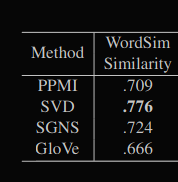
In the paper the correlation between the Glovemodel & the dataset wordsim is 0.666 which is a good bit higher than mine her of 0.53, I hope that this still counts as "..in the range..".

### analogy
The two analogy datasets present questions of the form 
#### a is to a* as b is to b*
where b* is hidden, and must be guessed from the entire vocabulary.

In [33]:
msr = pd.read_csv("msr.csv", sep=",", index_col=0)
msr.columns = ["type", "a", "a_star", "b", "b_star"]

# Since not all words that appear in this dataset also appear in the GloveModel, I quickly reduced
# this dataset to only contain the intersection of both

intersect = msr.a.to_list() + msr.a_star.to_list() + msr.b.to_list() + msr.b_star.to_list()
n_words_msr = len(intersect)
intersect = list(set(glove_words) & set(intersect))

for c in ["a", "a_star", "b", "b_star"]: # although b & b_star dont have other word´s than a & a_star
    msr = msr[msr.eval(c).isin(intersect)] # keeps only words that are in the intersection

intersect = msr.a.to_list() + msr.a_star.to_list() + msr.b.to_list() + msr.b_star.to_list()
n_words_msr_new = len(intersect)
new = n_words_msr - n_words_msr_new
print(f"We deleted {new} words & therfore reduced the # of words in msr from {n_words_msr} to {n_words_msr_new} ")
msr.reset_index(drop=True, inplace=True)
msr

We deleted 4000 words & therfore reduced the # of words in msr from 32000 to 28000 


,type,a,a_star,b,b_star
0,JJ_JJR,good,better,rough,rougher
1,JJR_JJ,better,good,rougher,rough
2,JJ_JJS,good,best,rough,roughest
3,JJS_JJ,best,good,roughest,rough
4,JJS_JJR,best,better,roughest,rougher
...,...,...,...,...,...
6995,VBD_VB,sent,send,avoided,avoid
6996,VB_VBZ,send,sends,avoid,avoids
6997,VBZ_VB,sends,send,avoids,avoid
6998,VBZ_VBD,sends,sent,avoids,avoided


### 3CosAdd
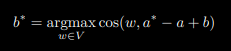
### 3CosMul
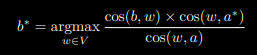
holds for both:

#### Explanation of the formulas (just for my own reference later on):
b* will be the word with the most similiar vector to the result of e.g.: a* - a + b

And in this context, the similiarity score between two words/vectors is determined by their cosine so, the most similiar vector will maximise it´s cosine with the resulting vector.

In [34]:
def CosAdd(cadd_vec, G=glove_vecs, glove_words=glove_words):
    cad_vec_scores = []
    cad_vec_words = []
    
    #  this ||y|| only needs to be calculated once
    G_GT = np.array([g @ g.T for g in glove_vecs.T]) #  ||y||

    for i, c_v in enumerate(cadd_vec):
    
        nominator = c_v @ G # (a* - a + b) @ GloveMatrix = (1,100) @ (100,400k) = (1,400k) || x @ y.T

        cadd_norm = c_v @ c_v.T # calculate ||x|| 

        avoid_idxs = np.where( (glove_words == msr.a[i]) | (glove_words == msr.a_star[i]) | (glove_words == msr.b[i]) )[0]
        simis_scores = nominator / np.sqrt( cadd_norm * G_GT )
        simis_scores[avoid_idxs] = -2
        
        idxs = np.argmax(simis_scores)
        cad_vec_scores.append(simis_scores[idxs]) 
        cad_vec_words.append(glove_words[idxs])

    names = ["cadd_vec_score", "cadd_vec"]        
    return pd.DataFrame([cad_vec_scores, cad_vec_words], index=names).T

In [35]:
colmns = ["a", "a_star", "b", "b_star"]
a, a_star, b, b_star = [np.array( [gloveModel[word] for word in msr.eval( col )] ) for col in colmns]
cadd_vec = a_star - a + b
cadd_vec.shape, cadd_vec

((7000, 100),
 array([[-0.329934 ,  0.22104  ,  0.57628  , ...,  0.58688  ,  0.16313  ,
         -0.428537 ],
        [-0.04348  , -0.318151 ,  1.15214  , ...,  0.47099  , -0.216218 ,
          1.52601  ],
        [-0.143511 , -0.10107  ,  0.92958  , ...,  0.44162  ,  0.39952  ,
         -0.102867 ],
        ...,
        [-0.81848  ,  0.26973  ,  0.2777   , ...,  0.258222 ,  0.238451 ,
          0.091588 ],
        [-0.5062391, -0.236966 , -0.14457  , ...,  0.257672 , -0.021739 ,
         -0.4464   ],
        [-0.7909209,  0.646729 ,  1.34575  , ...,  0.322201 ,  0.113812 ,
          0.3874   ]]))

In [36]:
df_cosadd = CosAdd(cadd_vec)

In [37]:
df_cosadd = pd.concat([msr, df_cosadd], axis=1)
df_cosadd["b_starVScadd_vec"] = df_cosadd.b_star == df_cosadd.cadd_vec
df_cosadd

,type,a,a_star,b,b_star,cadd_vec_score,cadd_vec,b_starVScadd_vec
0,JJ_JJR,good,better,rough,rougher,0.62981,rougher,True
1,JJR_JJ,better,good,rougher,rough,0.642782,smoother,False
2,JJ_JJS,good,best,rough,roughest,0.55345,track,False
3,JJS_JJ,best,good,roughest,rough,0.527231,unforgiving,False
4,JJS_JJR,best,better,roughest,rougher,0.550211,rougher,True
...,...,...,...,...,...,...,...,...
6995,VBD_VB,sent,send,avoided,avoid,0.745207,avoiding,False
6996,VB_VBZ,send,sends,avoid,avoids,0.754,avoids,True
6997,VBZ_VB,sends,send,avoids,avoid,0.780836,avoid,True
6998,VBZ_VBD,sends,sent,avoids,avoided,0.771829,avoided,True


In [38]:
cossaddresult = df_cosadd.b_starVScadd_vec.sum() / 7000
cossaddresult

0.574

### In table 2 of the paper we see GLOVE -> MSR -> Add -> 0.529 Therfor I think my 3CossAdd result of 0.574 is okay

In [39]:
def CosMul(a, a_star, b, b_star, G=glove_vecs, glove_words=glove_words):    
    epsilon = 0.001
    cmu_vec_scores = []
    cmu_vec_words = []
    G_GT = np.array([g @ g.T for g in glove_vecs.T]) # list of ||y|| for each glovemodel vec   
    norm = lambda x: (x+1) /2
    
    for i in range(len(a)):
        aasb = np.vstack((a[i], a_star[i], b[i]))
        nominator_3 = aasb @ G  # aasb Matrix @ GloveMatrix = (3,100) @ (100,400k) = (3,400k)
        
        a_aT, as_asT, b_bT = [(vec @ vec.T) for vec in aasb] # calculate ||x|| for the i-th a, a_star & b vector
        
        simis_scores_a = nominator_3[0] / np.sqrt( a_aT * G_GT )    
        simis_scores_as = nominator_3[1] / np.sqrt( as_asT * G_GT )   
        simis_scores_b = nominator_3[2] / np.sqrt( b_bT * G_GT )

        aasb_scores = (norm(simis_scores_b) * norm(simis_scores_as)) / (norm(simis_scores_a) + epsilon)
        
        avoid_idxs = np.where( (glove_words == msr.a[i]) | (glove_words == msr.a_star[i]) | (glove_words == msr.b[i]) )[0]
        aasb_scores[avoid_idxs] = -np.inf
        
        idxs = np.argmax(aasb_scores)
        cmu_vec_scores.append(aasb_scores[idxs]) 
        cmu_vec_words.append(glove_words[idxs])
        
    names = ["cmull_vec_score", "cmull_vec"]        
    return pd.DataFrame([cmu_vec_scores, cmu_vec_words], index=names).T

In [40]:
df_cosmul = CosMul(a, a_star, b, b_star)

In [41]:
df_cosmul = pd.concat([msr, df_cosmul], axis=1)
df_cosmul["b_starVSmul_vec"] = df_cosmul.b_star == df_cosmul.cmull_vec
df_cosmul

,type,a,a_star,b,b_star,cmull_vec_score,cmull_vec,b_starVSmul_vec
0,JJ_JJR,good,better,rough,rougher,0.850836,rougher,True
1,JJR_JJ,better,good,rougher,rough,0.826777,bumpy,False
2,JJ_JJS,good,best,rough,roughest,0.804598,track,False
3,JJS_JJ,best,good,roughest,rough,0.898379,nitpicky,False
4,JJS_JJR,best,better,roughest,rougher,0.88271,shakeouts,False
...,...,...,...,...,...,...,...,...
6995,VBD_VB,sent,send,avoided,avoid,0.941377,avoiding,False
6996,VB_VBZ,send,sends,avoid,avoids,0.920208,avoids,True
6997,VBZ_VB,sends,send,avoids,avoid,0.942402,avoiding,False
6998,VBZ_VBD,sends,sent,avoids,avoided,0.993606,avoided,True


In [42]:
sum(df_cosmul["b_starVSmul_vec"]) / 7000

0.5452857142857143

### In table 2 of the paper we see GLOVE -> MSR -> Mul -> 0.576 Therfor I think my 3CossAdd result of 0.545 is okay

Note: The runtime for CosAdd & Cos Mul was around 10min for each

<a name="section-taskB"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with WE (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task follows the same instruction for document classification as provided in Assignment 1. You are indeed free to reuse any part of your code in Assignment 1 for this task. In Assignment 1, the representation of each document was created using a bag of words representation followed by dimensionality reduction. In this task, the document representations are created from the pre-trained word embeddings.

**Map word embeddings to dictionary words (2 points).** For every word in the dictionary (as discussed and created in Assignment 1), fetch the corresponding word embedding from the pre-trained model. If no embedding is found, initialize the corresponding word embedding randomly.

**Document embedding as the average of word embeddings (5 points).** Using the word embeddings, the representation of each document is defined as the *mean of the vectors of each document's words*. In particular, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document.

**Classification and evaluation (3 points)** Using these new document representations, apply <ins>three classification algorithms</ins> and report the evaluation results (based on accuracy metric) on the test set.

</div>

In [36]:
data_path = "vocab_words_ordered_small.txt"
as1_words = pd.read_csv(data_path, sep='\n', names=["name"])


In [37]:
our_min = float('inf')
our_max = float('-inf')

for array in gloveModel.values():
    cur_min = min(array)
    cur_max = max(array)
    if cur_min < our_min:
        our_min = cur_min
    if cur_max > our_max:
        our_max = cur_max
print(our_min, our_max)

-4.0666 3.575


In [38]:
# dictionary with words/keys and embedding_array/values:

import random
random.seed(0)

from collections import defaultdict

word_embedded_dict = defaultdict(lambda: np.random.uniform(low=our_min, high=our_max, size=(len(gloveModel['example']))))

## Document embedding as the average of word embeddings

Create a document/sentence embedding.

In [39]:
Z_train_dir = (data_dir / f"thedeep.{size}.train.txt")
pd_train = pd.read_csv(Z_train_dir, sep=',', names=["id", "text", "label"])
pd_train.head()

,id,text,label
0,6615,Cholera Daily Situation Report as of 4 Novembe...,4
1,659,"12 321 people affected, five deaths, one perso...",10
2,8591,Violent clashes and inter-communal tensions ha...,3
3,8373,AT least 12 people have been killed and severa...,5
4,10125,"Unidentified gunmen attacked a civilian home, ...",9


In [40]:
def from_string_to_list(string_):
    
    # Remove punctuations:
    listed_str = string_.translate(str.maketrans('', '', string.punctuation))
    
    # Lower all words:
    listed_str = str.lower(listed_str)
    
    # Transform list into list:
    return listed_str.split()


In [41]:
import string

def E_trans(df, gloveModel, word_embedded_dict):
    
    E = np.zeros((df.shape[0], len(gloveModel['example']))) # sentence_embedded/rows 
    
    for ind_sentence, single_sentence in enumerate(list(df['text'])):
        
        listed_str = from_string_to_list(single_sentence)
        
        for single_word in listed_str:
            
            try:
                foundable = gloveModel[single_word]
                E[ind_sentence] += foundable
                
            except:

                E[ind_sentence] += word_embedded_dict[single_word]
            
        E[ind_sentence] /= len(listed_str)
        
    return E

In [42]:
E_train = E_trans(pd_train, gloveModel, word_embedded_dict) # input for our classification model
E_train

array([[-0.12692559,  0.12241303,  0.2092255 , ..., -0.20869879,
         0.46802627, -0.26579585],
       [ 0.07112249,  0.29780366,  0.13595179, ..., -0.15050169,
         0.36498512, -0.05317277],
       [-0.15403681,  0.15164721, -0.02207994, ..., -0.20238419,
         0.63861916,  0.0517603 ],
       ...,
       [ 0.0221995 ,  0.19379327,  0.19515264, ..., -0.23452028,
         0.57566004,  0.05632414],
       [-0.10013704, -0.00381176,  0.17713409, ..., -0.00519206,
         0.57804382,  0.16578793],
       [ 0.01116752,  0.40058019,  0.41809621, ..., -0.20616769,
         0.57583452, -0.11762231]])

## Classification and evaluation

Use 3 classification algorithms with document representation. Evaluate them with accuracy on test set.

### Preparation

In [43]:
# Get accuracy:
def acc(prediction, y):
    return len(np.where(y==prediction)[0])/len(y) 

In [44]:
# Get test set:
Z_test_dir = (data_dir / f"thedeep.{size}.test.txt")
pd_test = pd.read_csv(Z_test_dir, sep=',', names=["id", "text", "label"])

X_test = pd_test['text']
y_test = pd_test['label']

E_test = E_trans(pd_test, gloveModel, word_embedded_dict)


In [45]:
# True labels training set (needed for accuracy determining):
y_train = pd_train['label']

### Classifier 1: kNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
def my_kNN(train_X, train_y, test_X, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X, train_y)
    return knn.predict(test_X)

In [47]:
pred_knn = my_kNN(E_train, y_train, E_test, 20) # k:acc ->  1:0.48, 10:0.53, 20:0.54,25:0.53, 2000:0.42,   
acc_knn = acc(pred_knn, y_test)
acc_knn

0.5277777777777778

### Classifier 2: Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
def my_RF(train_X, train_y, test_X):
    rf = RandomForestClassifier(random_state=21)
    rf.fit(train_X, train_y)
    return rf.predict(test_X)

In [49]:
pred_rf = my_RF(E_train, y_train, E_test)
acc_rf = acc(pred_rf, y_test)
acc_rf

0.5244444444444445

### Classifier 3: Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
def my_logistic_regression_task_c(train_X, train_y, test_X):
    logist_regression = LogisticRegression(random_state=21, max_iter=1000)
    logist_model = logist_regression.fit(train_X, train_y)
    return logist_model.predict(test_X)  


In [51]:
pred_reg = my_logistic_regression_task_c(E_train, y_train, E_test)
acc_reg = acc(pred_reg, y_test)
acc_reg

0.5783333333333334

### Evaluation of classifiers

The Random Forest Classifier performs with an accuracy of circa 0.53 the worst. Second best is the kNN classifier with about 0.54 accuracy. The Logistic Regression achieved the best result with around 0.59. However, in Assignment 1 we got a slightly better result with Random Forest (circa 0.61).

<a name="section-references"></a><h2 style="color:rgb(0,120,170)">References</h2>

[1] O. Levy, Y. Goldberg, and I. Dagan. Improving distributional similarity with lessons learned from word embeddings. Transactions of the Association for Computational Linguistics, 3:211– 225, 2015.

[2] M. Pagliardini, P. Gupta, and M. Jaggi. Unsupervised Learning of Sentence Embeddings using Compositional n-Gram Features. In Proceedings of the conference of the North American Chapter of the Association for Computational Linguistics (NAACL), 2018.